In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv', 'car_fuel_efficiency.csv')

('car_fuel_efficiency.csv', <http.client.HTTPMessage at 0x24b1914de90>)

In [42]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [43]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


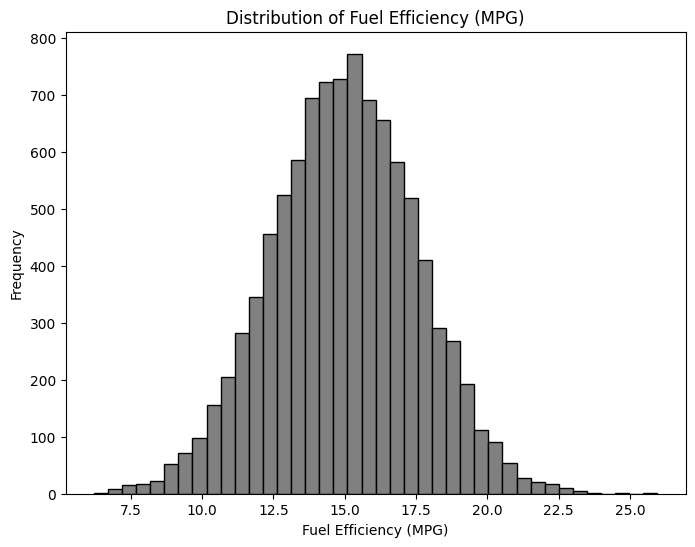

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df['fuel_efficiency_mpg'], bins=40, edgecolor='black', color='gray')
ax.set_title('Distribution of Fuel Efficiency (MPG)')
ax.set_xlabel('Fuel Efficiency (MPG)')
ax.set_ylabel('Frequency')
plt.show()

## Q1

In [8]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [10]:
median_horsepower = df['horsepower'].median()
median_horsepower

np.float64(149.0)

### Prepare and split the dataset

In [44]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# shuffle the data
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

# split the data
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

# reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# target variable
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

In [45]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

## Q3

`0` fill

In [37]:
df_train['horsepower'] = df['horsepower'].fillna(value=0)
df_val['horsepower'] = df['horsepower'].fillna(value=0)
df_test['horsepower'] = df['horsepower'].fillna(value=0)

In [53]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [39]:
w0, w = train_linear_regression(df_train, y_train)
y_pred = w0 + df_val.dot(w)

In [40]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [41]:
print(round(rmse(y_val, y_pred), 2))

0.55


`mean` fill

In [29]:
value = df_train['horsepower'].mean()
df_train['horsepower'] = df_train['horsepower'].fillna(value)
df_val['horsepower'] = df_val['horsepower'].fillna(value)
df_test['horsepower'] = df_test['horsepower'].fillna(value)

In [30]:
w0, w = train_linear_regression(df_train, y_train)
y_pred = w0 + df_val.dot(w)

In [32]:
print(round(rmse(y_val, y_pred), 2))

0.46


## Q4

In [46]:
df_train['horsepower'] = df['horsepower'].fillna(value=0)
df_val['horsepower'] = df['horsepower'].fillna(value=0)
df_test['horsepower'] = df['horsepower'].fillna(value=0)

In [50]:
def train_linear_regression_r(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.ones(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1: ]

In [51]:
rs = [0, 0.01, 0.1, 1, 5, 10, 100]

for r in rs:
    w0, w = train_linear_regression_r(df_train, y_train, r)
    y_pred = w0 + df_val.dot(w)
    error = rmse(y_val, y_pred)

    print(f"r: {r}, rmse: {round(error, 3)}")

r: 0, rmse: 0.552
r: 0.01, rmse: 0.551
r: 0.1, rmse: 0.553
r: 1, rmse: 0.556
r: 5, rmse: 0.557
r: 10, rmse: 0.557
r: 100, rmse: 0.557


`r = 0.01` gives the smallest RMSE

## Q5

In [54]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for seed in seeds:
    np.random.seed(seed)
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    # shuffle the data
    idx = np.arange(n)
    np.random.shuffle(idx)

    # split the data
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    # reset index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # target variable
    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values
    y_test = df_test['fuel_efficiency_mpg'].values
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    df_train['horsepower'] = df['horsepower'].fillna(value=0)
    df_val['horsepower'] = df['horsepower'].fillna(value=0)
    df_test['horsepower'] = df['horsepower'].fillna(value=0)

    w0, w = train_linear_regression(df_train, y_train)
    y_pred = w0 + df_val.dot(w)
    error = rmse(y_val, y_pred)
    scores.append(error)

scores = np.array(scores)
print(round(np.std(scores), 3))

0.007


## Q6

In [55]:
np.random.seed(9)
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# shuffle the data
idx = np.arange(n)
np.random.shuffle(idx)

# split the data
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = pd.concat([df_train, df_val])

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

del df_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [56]:
df_train['horsepower'] = df['horsepower'].fillna(value=0)
df_test['horsepower'] = df['horsepower'].fillna(value=0)

w0, w = train_linear_regression_r(df_train, y_train, 0.001)

y_pred = w0 + df_test.dot(w)

print(round(rmse(y_test, y_pred), 3))


0.548
